In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
ls 'gdrive/My Drive/left_fist.npy'

'gdrive/My Drive/left_fist.npy'


In [0]:
left_fist = np.load('gdrive/My Drive/left_fist.npy')
right_fist = np.load('gdrive/My Drive/right_fist.npy')
both_fist = np.load('gdrive/My Drive/both_fist.npy')
both_feet = np.load('gdrive/My Drive/both_feet.npy')

In [5]:
left_fist = np.array(left_fist[:530])
right_fist = np.array(right_fist[:530])
both_fist = np.array(both_fist)
both_feet = np.array(both_feet)
print(left_fist.shape)
print(right_fist.shape)
print(both_fist.shape)
print(both_feet.shape)

(530, 64, 113)
(530, 64, 113)
(530, 64, 113)
(530, 64, 113)


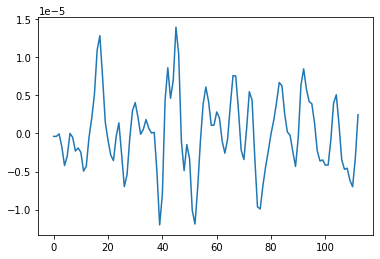

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


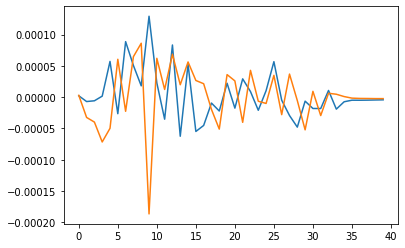

In [6]:
#plt.plot(left_fist[0][0])
#plt.show()
plt.plot(right_fist[0][0])
plt.show()
#plt.plot(np.fft.fft(both_fist[0][0])[:40])
plt.plot(np.fft.fft(left_fist[0][0])[:40])
plt.plot(np.fft.fft(right_fist[0][0])[:40])

#plt.plot(both_fist[0][0])
#plt.show()
#plt.plot(both_feet[0][0])

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))


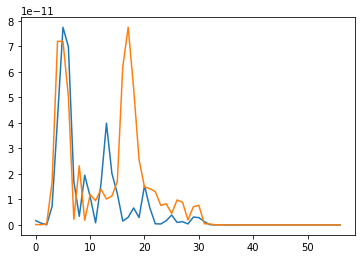

In [7]:
plt.plot(scipy.signal.welch(left_fist)[1][90][8])
plt.plot(scipy.signal.welch(right_fist)[1][90][8])
#plt.plot(both_fist[0][0])
#plt.plot(both_feet[0][0])

In [8]:
print(abs(np.sum(left_fist[0][0] - right_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_feet[0][0])))
print(abs(np.sum(both_feet[0][0] - both_fist[0][0])))

6.853359500868575e-07
1.6039158473338503e-05
3.0591367277883825e-05
1.4552208804545327e-05


In [0]:
events = np.zeros((2120,4))
ones = np.ones((530,))

In [0]:
# left fist
events[:530,0] = events[:530,0] + ones
# right fist
events[530:1060,1] = events[530:1060,1] + ones
# both fist 
events[1060:1590,2] = events[1060:1590,2] + ones
# both feet
events[1590:,3] = events[1590:,3] + ones

In [0]:
def preprocessing(data):
    mean = np.mean(data, axis = 0)    
    var = np.var(data, axis = 0)
    data = (data - mean)/var
    return data
#data_array = preprocessing(data)

In [12]:
# fast fourier transform
a = np.fft.fft(left_fist)[:,:,:40]
a.shape

(530, 64, 40)

In [0]:
f_left_fist = np.fft.fft(left_fist)[:,:,:40].real
f_left_fist = preprocessing(f_left_fist).reshape((530,2560))
f_right_fist = np.fft.fft(right_fist)[:,:,:40].real
f_right_fist = preprocessing(f_right_fist).reshape((530,2560))
f_both_fist = np.fft.fft(both_fist)[:,:,:40].real
f_both_fist = preprocessing(f_both_fist).reshape((530,2560))
f_both_feet = np.fft.fft(both_feet)[:,:,:40].real
f_both_feet = preprocessing(f_both_feet).reshape((530,2560))

In [14]:
print(f_left_fist.shape)
print(f_right_fist.shape)
print(f_both_fist.shape)
print(f_both_feet.shape)

(530, 2560)
(530, 2560)
(530, 2560)
(530, 2560)


In [15]:
fft_data = np.concatenate((f_left_fist, f_right_fist, f_both_fist, f_both_feet), axis = 0)
fft_data.shape

(2120, 2560)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
x_train, x_test, y_train, y_test = train_test_split(fft_data, events, test_size=0.3, random_state=42)
y_test.shape

(636, 4)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
from sklearn.metrics import confusion_matrix
import tensorflow as tf
def result(x_test, y_test):
  y_pred = classifier.predict(x_test)
  y_classes = y_pred.argmax(axis=-1)
  label =  tf.keras.utils.to_categorical(np.asarray(y_classes)) 
  matrix = confusion_matrix(y_test.argmax(axis=1), label.argmax(axis=1))
  FP = np.sum(matrix.sum(axis=0) - np.diag(matrix))/4  
  FN = np.sum(matrix.sum(axis=1) - np.diag(matrix))/4
  TP = np.sum(np.diag(matrix))/4
  TN = np.sum(matrix.sum() - (FP + FN + TP))/4
  data = []
  # Overall accuracy
  accuracy = (TP+TN)/(TP+FP+FN+TN)
  data.append(accuracy)
  #Error
  error = (FP + FN)/(TP + TN + FN + FP)
  data.append(error)
  # Sensitivity, hit rate, recall, or true positive rate
  sensitivity = TP/(TP+FN)  
  data.append(sensitivity)
  # Specificity or true negative rate
  specificity = TN/(TN+FP)
  data.append(specificity)
  # Precision or positive predictive value
  precision = TP/(TP+FP)
  data.append(precision)
  # Fall out or false positive rate
  false_positive_rate = FP/(FP+TN)
  data.append(false_positive_rate)

  #F-score
  f_score = (2*(precision *sensitivity))/(precision  + sensitivity)
  data.append(f_score)
  # False discovery rate
  FDR = FP/(TP+FP)
  data.append(FDR)
  # Negative predictive value
  NPV = TN/(TN+FN)
  data.append(NPV)
  return data
test_results = result(x_test, y_test)
test_results

[0.38270326255826,
 0.6172967374417401,
 0.2971698113207547,
 0.44967682363804246,
 0.2971698113207547,
 0.5503231763619575,
 0.2971698113207547,
 0.7028301886792453,
 0.44967682363804246]

In [20]:
train_results = result(x_train, y_train)
train_results

[0.49699289229086935,
 0.5030071077091307,
 0.45754716981132076,
 0.5310907237512742,
 0.45754716981132076,
 0.4689092762487258,
 0.45754716981132076,
 0.5424528301886793,
 0.5310907237512742]